# CRIME DATA H-CLUSTERING

Lets load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

Lets load our data and perform EDA

In [2]:
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.shape

(50, 5)

In [4]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

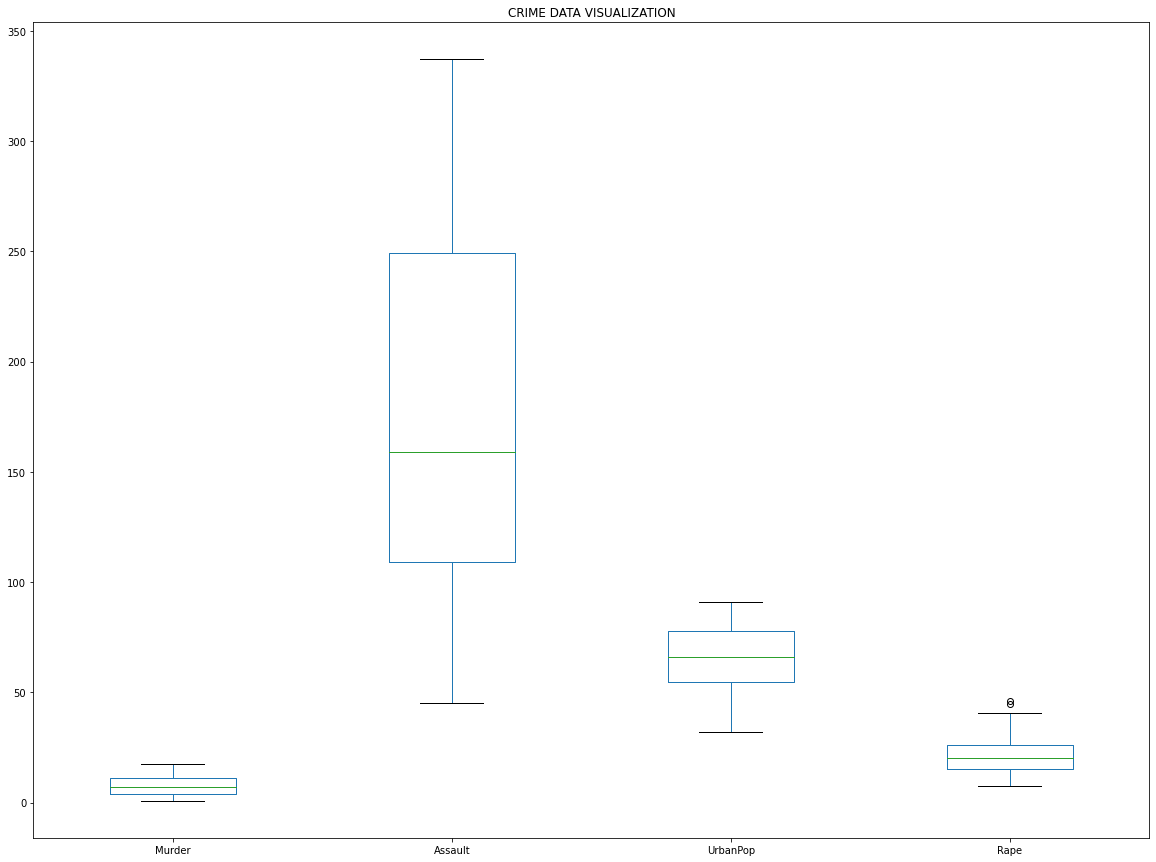

In [10]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='box', title="CRIME DATA VISUALIZATION")
plt.show()

Seems like only `Rape` column has outliers, lets view that chart seperately

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

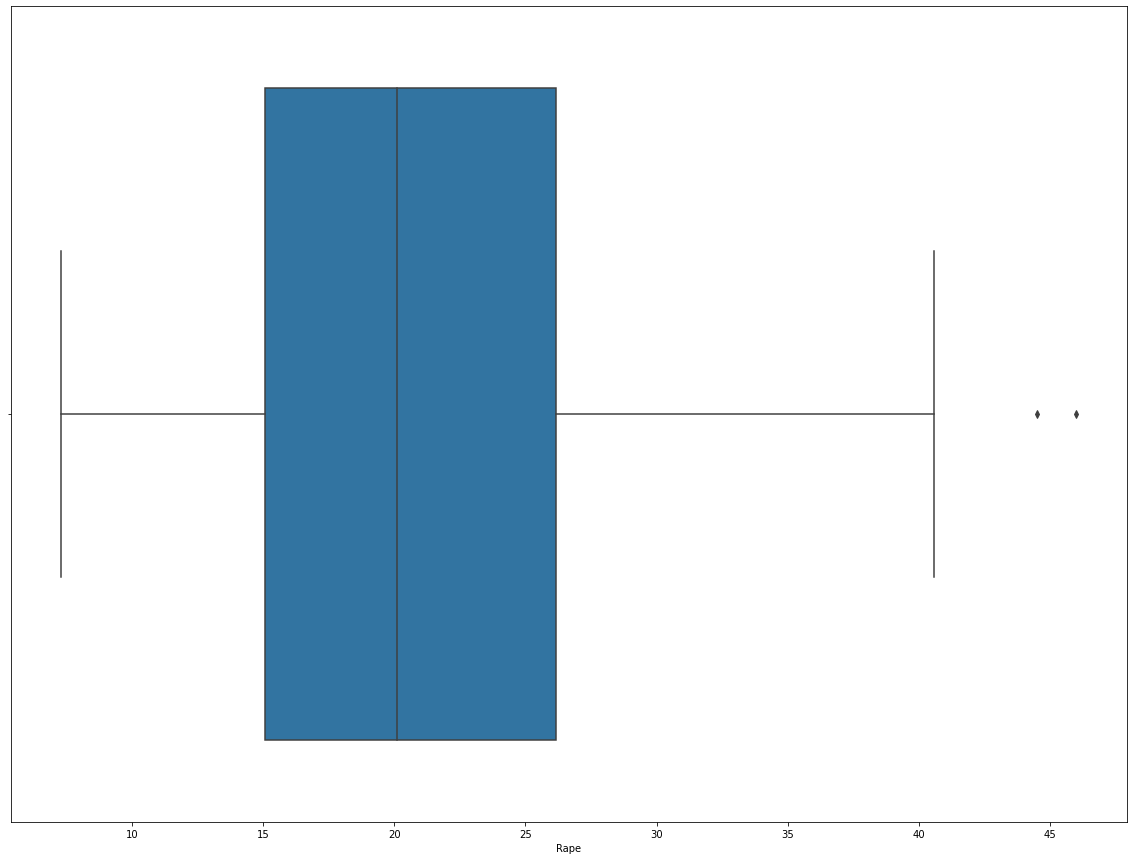

In [11]:
sns.boxplot(df['Rape'])

As we can see that there are atleast two values which are outlier in `Rape` column

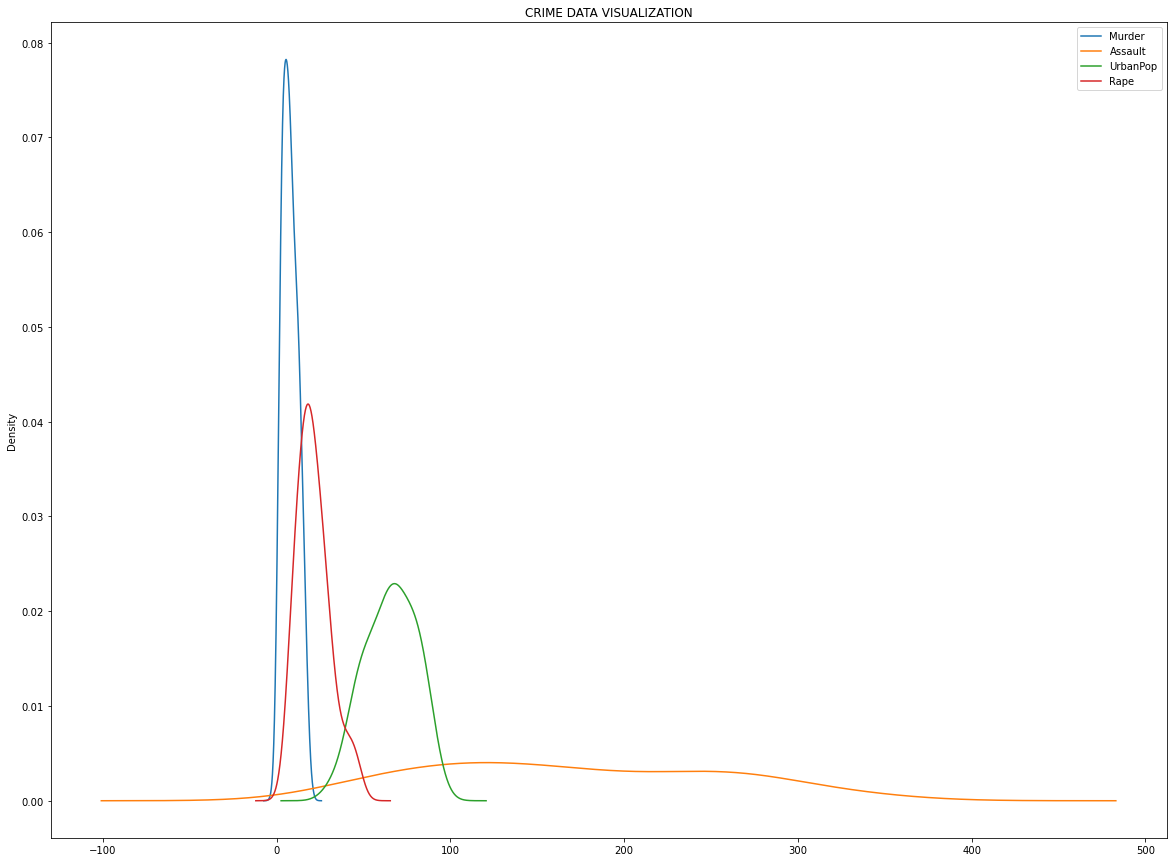

In [13]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='kde', title="CRIME DATA VISUALIZATION")
plt.show()

From the above plot we can see the distribution of each variable:

1 - We are seeing Murder and Rape to be float value whereas, Assualt and UrbanPop being integer. It would make sense to make all values as Interger

In [17]:
df['Murder'] = df['Murder'].astype('int64')
df['Rape'] = df['Rape'].astype('int64')
df.dtypes

Unnamed: 0    object
Murder         int64
Assault        int64
UrbanPop       int64
Rape           int64
dtype: object

Now all the values are Int64

Lets recreate KDE plot to see if there is any change in the distribution

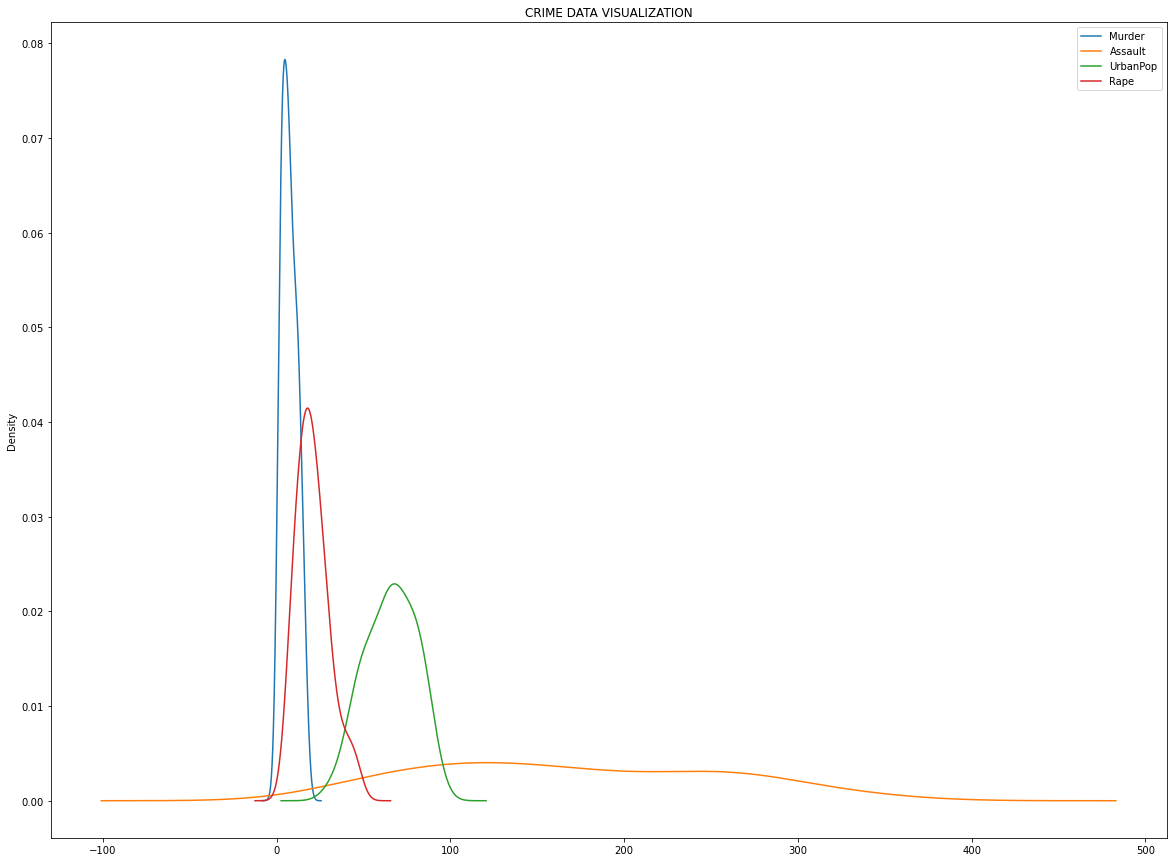

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='kde', title="CRIME DATA VISUALIZATION")
plt.show()

Lets see the correlation between each variable

In [29]:
data = df.copy()

In [30]:
data = data.drop(columns='Unnamed: 0')

In [31]:
data

,Murder,Assault,UrbanPop,Rape
0,13,236,58,21
1,10,263,48,44
2,8,294,80,31
3,8,190,50,19
4,9,276,91,40
5,7,204,78,38
6,3,110,77,11
7,5,238,72,15
8,15,335,80,31
9,17,211,60,25


<AxesSubplot:>

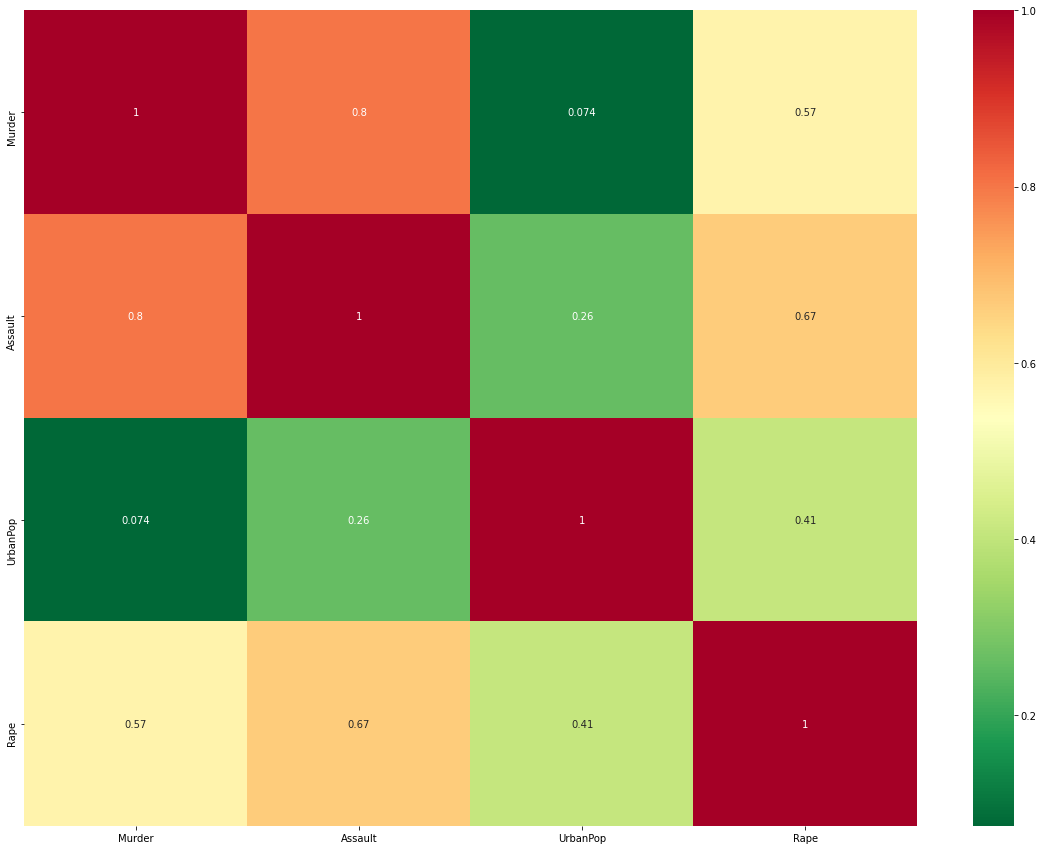

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r')

From the above chart we can relate following stuff:

Murder has high correlation with Assault,
Murder has low correlation with UrbanPop,
Murder has moderate to high correlation with Rape.

Assualt and Rape have moderate to high correlation.

Urbanpop has minor correlation with Assault and moderate correlation with Rape.

## We saw atleast couple of points being outlier in Rape column, lets see how many acutal values are outliers

In [39]:
Q1 = data.quantile(0.25) # 25th Percentile
Q3 = data.quantile(0.75) # 75th Percentile

IQR = Q3 - Q1
IQR # To see IQR value of each column

Murder        7.00
Assault     140.00
UrbanPop     23.25
Rape         11.75
dtype: float64

Lets see how many outliers we have in our dataset

In [42]:
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
outliers.sum()

Murder      0
Assault     0
UrbanPop    0
Rape        2
dtype: int64

Lets see what is the Range of the data

In [44]:
def range(i):
    x = (i.max()) - (i.min())
    return(x)

data_range = range(data)
data_range

Murder       17
Assault     292
UrbanPop     59
Rape         39
dtype: int64

In [45]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,7.420000,170.760000,65.540000,20.820000
std,4.412829,83.337661,14.474763,9.393202
min,0.000000,45.000000,32.000000,7.000000
25%,4.000000,109.000000,54.500000,14.250000
50%,7.000000,159.000000,66.000000,20.000000
75%,11.000000,249.000000,77.750000,26.000000
max,17.000000,337.000000,91.000000,46.000000


From the above range code we can see that our range of the data is not on same scale, lets get our data on same scale, we will standardized our data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaled = data.copy()

In [49]:
cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']
d = scaler.fit_transform(scaled)
d = pd.DataFrame(d, columns= cols)
d

,Murder,Assault,UrbanPop,Rape
0,1.277333,0.790787,-0.526195,0.019357
1,0.590595,1.118060,-1.224067,2.492796
2,0.132769,1.493817,1.009122,1.094765
3,0.132769,0.233212,-1.084492,-0.195724
4,0.361682,1.275635,1.776781,2.062633
5,-0.096143,0.402909,0.869548,1.847551
6,-1.011794,-0.736484,0.799761,-1.056051
7,-0.553969,0.815030,0.450825,-0.625888
8,1.735158,1.990786,1.009122,1.094765
9,2.192983,0.487757,-0.386621,0.449521


In [51]:
d.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.776357e-17,1.298961e-16,-4.263256e-16,-3.330669e-17
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.698532e+00,-1.524362e+00,-2.340661e+00,-1.486214e+00
25%,-7.828814e-01,-7.486054e-01,-7.704502e-01,-7.065431e-01
50%,-9.614333e-02,-1.425453e-01,3.210209e-02,-8.818346e-02
75%,8.195074e-01,9.483628e-01,8.521012e-01,5.570614e-01
max,2.192983e+00,2.015028e+00,1.776781e+00,2.707878e+00


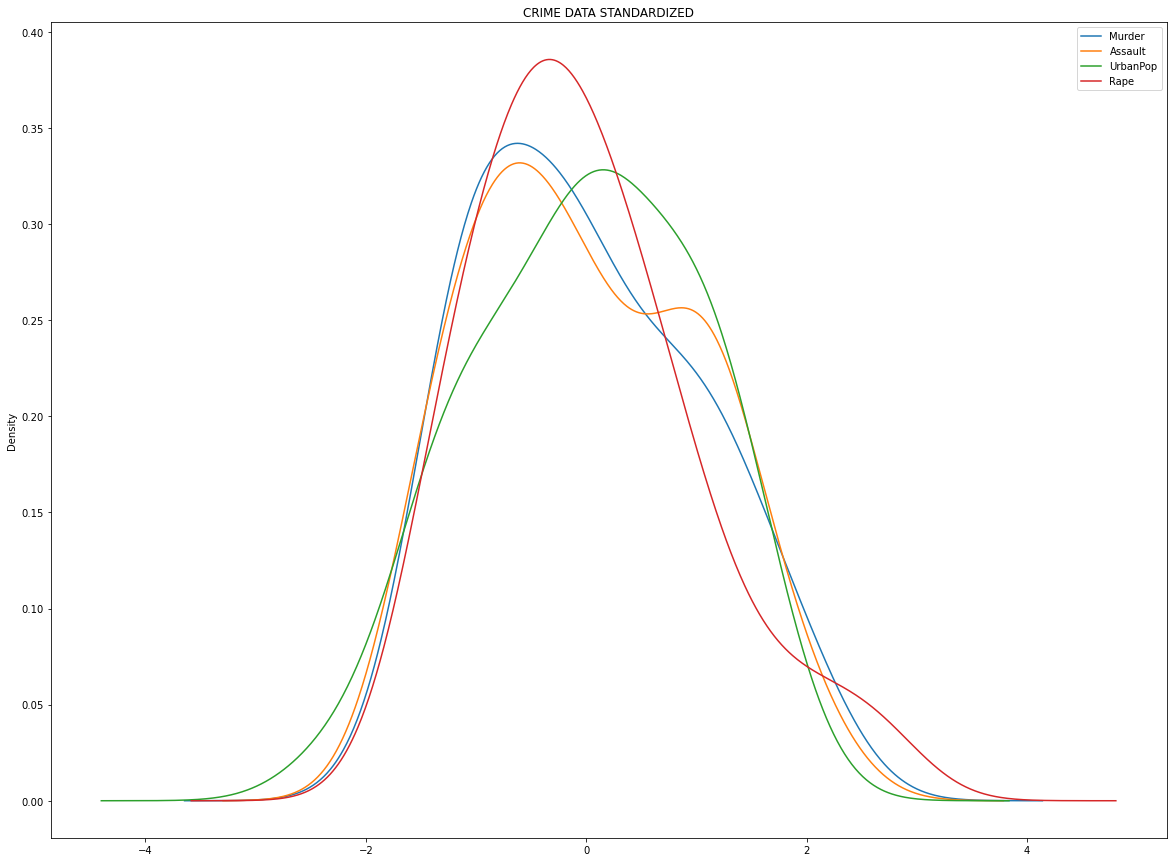

In [53]:
plt.rcParams['figure.figsize'] = (20,15)
d[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='kde', title="CRIME DATA STANDARDIZED")
plt.show()

# Lets Cluster our dataset (Standardized dataset)

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
z = linkage(d, method='complete', metric = 'euclidean')
z

array([[14.        , 28.        ,  0.22644486,  2.        ],
       [12.        , 31.        ,  0.38231718,  2.        ],
       [13.        , 15.        ,  0.40242289,  2.        ],
       [22.        , 48.        ,  0.48793421,  2.        ],
       [36.        , 46.        ,  0.55516766,  2.        ],
       [35.        , 52.        ,  0.56564637,  3.        ],
       [19.        , 30.        ,  0.60499227,  2.        ],
       [18.        , 50.        ,  0.68372256,  3.        ],
       [16.        , 25.        ,  0.69027486,  2.        ],
       [40.        , 47.        ,  0.7019197 ,  2.        ],
       [45.        , 49.        ,  0.73907713,  2.        ],
       [34.        , 55.        ,  0.74474783,  4.        ],
       [ 0.        , 17.        ,  0.74678977,  2.        ],
       [20.        , 29.        ,  0.78133574,  2.        ],
       [11.        , 26.        ,  0.78432339,  2.        ],
       [23.        , 39.        ,  0.79713427,  2.        ],
       [42.        , 51.

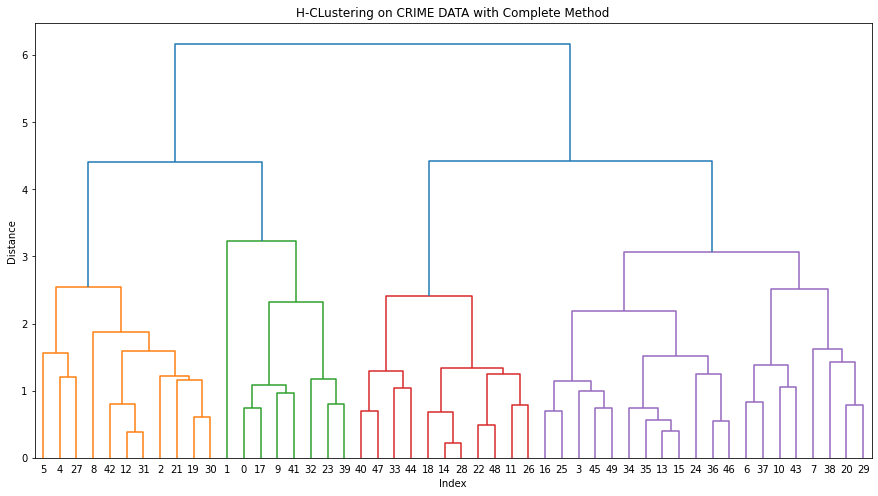

In [60]:
plt.figure(figsize=(15,8));plt.title('H-CLustering on CRIME DATA with Complete Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

Lets Use Single Method

In [63]:
z_sing = linkage(d, method='single', metric = 'euclidean')
z_sing

array([[14.        , 28.        ,  0.22644486,  2.        ],
       [12.        , 31.        ,  0.38231718,  2.        ],
       [13.        , 15.        ,  0.40242289,  2.        ],
       [22.        , 48.        ,  0.48793421,  2.        ],
       [35.        , 52.        ,  0.50611655,  3.        ],
       [18.        , 50.        ,  0.517046  ,  3.        ],
       [36.        , 46.        ,  0.55516766,  2.        ],
       [45.        , 54.        ,  0.57882063,  4.        ],
       [26.        , 57.        ,  0.59884738,  5.        ],
       [19.        , 30.        ,  0.60499227,  2.        ],
       [21.        , 59.        ,  0.60550917,  3.        ],
       [37.        , 58.        ,  0.61013941,  6.        ],
       [53.        , 55.        ,  0.63826118,  5.        ],
       [34.        , 61.        ,  0.66618439,  7.        ],
       [62.        , 63.        ,  0.68265604, 12.        ],
       [16.        , 25.        ,  0.69027486,  2.        ],
       [40.        , 47.

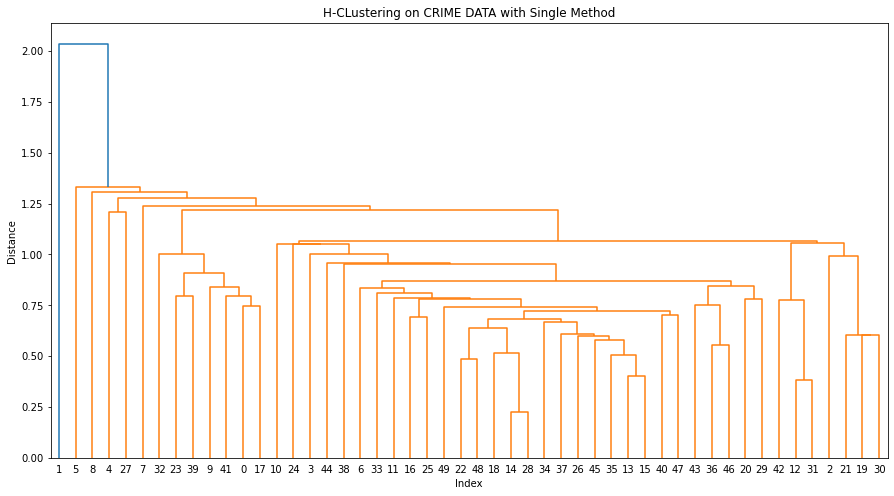

In [64]:
plt.figure(figsize=(15,8));plt.title('H-CLustering on CRIME DATA with Single Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_sing, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

Lets see with Centroid Method

In [65]:
z_cent = linkage(d, method='centroid', metric = 'euclidean')
z_cent

array([[14.        , 28.        ,  0.22644486,  2.        ],
       [12.        , 31.        ,  0.38231718,  2.        ],
       [13.        , 15.        ,  0.40242289,  2.        ],
       [22.        , 48.        ,  0.48793421,  2.        ],
       [35.        , 52.        ,  0.49756291,  3.        ],
       [36.        , 46.        ,  0.55516766,  2.        ],
       [45.        , 54.        ,  0.57468796,  4.        ],
       [18.        , 50.        ,  0.59547228,  3.        ],
       [19.        , 30.        ,  0.60499227,  2.        ],
       [16.        , 25.        ,  0.69027486,  2.        ],
       [34.        , 56.        ,  0.69904429,  5.        ],
       [40.        , 47.        ,  0.7019197 ,  2.        ],
       [ 0.        , 17.        ,  0.74678977,  2.        ],
       [42.        , 51.        ,  0.76890603,  3.        ],
       [20.        , 29.        ,  0.78133574,  2.        ],
       [11.        , 26.        ,  0.78432339,  2.        ],
       [23.        , 39.

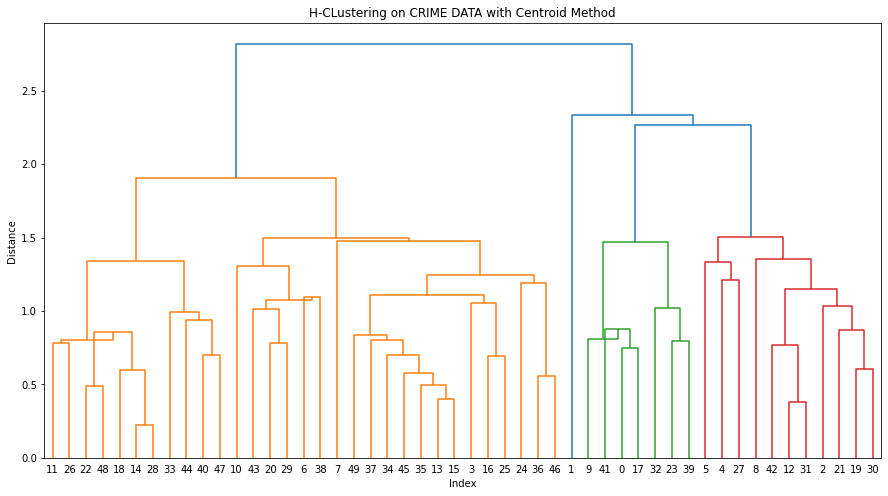

In [66]:
plt.figure(figsize=(15,8));plt.title('H-CLustering on CRIME DATA with Centroid Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_cent, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

WARD Method

In [67]:
z_ward = linkage(d, method='ward', metric = 'euclidean')
z_ward

array([[14.        , 28.        ,  0.22644486,  2.        ],
       [12.        , 31.        ,  0.38231718,  2.        ],
       [13.        , 15.        ,  0.40242289,  2.        ],
       [22.        , 48.        ,  0.48793421,  2.        ],
       [36.        , 46.        ,  0.55516766,  2.        ],
       [35.        , 52.        ,  0.57453616,  3.        ],
       [19.        , 30.        ,  0.60499227,  2.        ],
       [18.        , 50.        ,  0.68759216,  3.        ],
       [16.        , 25.        ,  0.69027486,  2.        ],
       [40.        , 47.        ,  0.7019197 ,  2.        ],
       [45.        , 55.        ,  0.70384613,  4.        ],
       [ 0.        , 17.        ,  0.74678977,  2.        ],
       [20.        , 29.        ,  0.78133574,  2.        ],
       [11.        , 26.        ,  0.78432339,  2.        ],
       [23.        , 39.        ,  0.79713427,  2.        ],
       [34.        , 37.        ,  0.83169495,  2.        ],
       [42.        , 51.

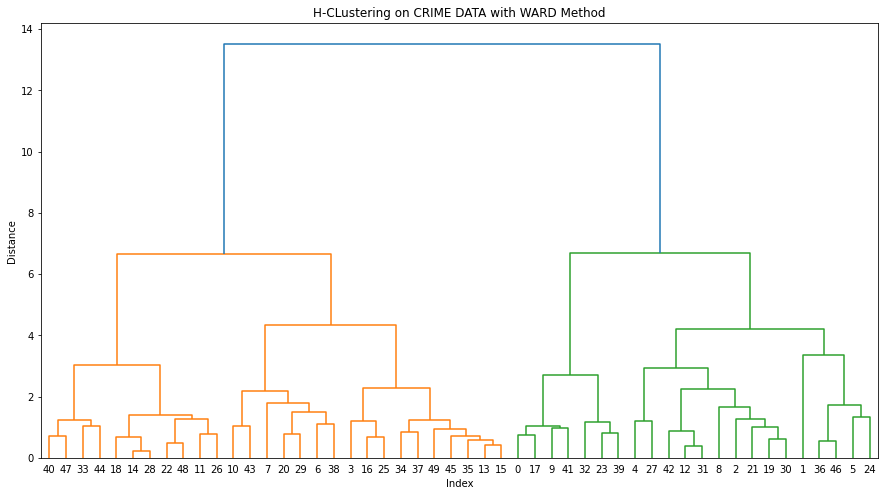

In [68]:
plt.figure(figsize=(15,8));plt.title('H-CLustering on CRIME DATA with WARD Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

Average method

In [69]:
z_avg = linkage(d, method='average', metric = 'euclidean')
z_avg

array([[14.        , 28.        ,  0.22644486,  2.        ],
       [12.        , 31.        ,  0.38231718,  2.        ],
       [13.        , 15.        ,  0.40242289,  2.        ],
       [22.        , 48.        ,  0.48793421,  2.        ],
       [35.        , 52.        ,  0.53588146,  3.        ],
       [36.        , 46.        ,  0.55516766,  2.        ],
       [18.        , 50.        ,  0.60038428,  3.        ],
       [19.        , 30.        ,  0.60499227,  2.        ],
       [45.        , 54.        ,  0.63803504,  4.        ],
       [16.        , 25.        ,  0.69027486,  2.        ],
       [40.        , 47.        ,  0.7019197 ,  2.        ],
       [ 0.        , 17.        ,  0.74678977,  2.        ],
       [34.        , 58.        ,  0.77288478,  5.        ],
       [20.        , 29.        ,  0.78133574,  2.        ],
       [11.        , 26.        ,  0.78432339,  2.        ],
       [42.        , 51.        ,  0.79216406,  3.        ],
       [23.        , 39.

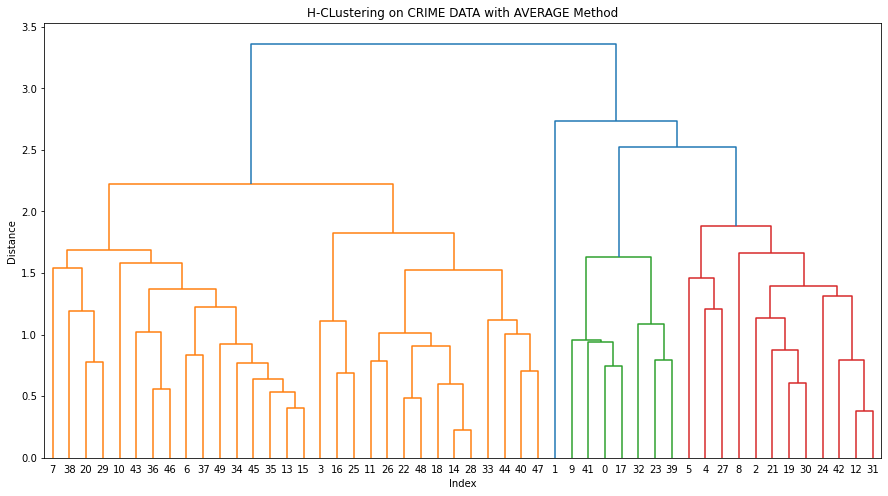

In [70]:
plt.figure(figsize=(15,8));plt.title('H-CLustering on CRIME DATA with AVERAGE Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_avg, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

## From the above analysis, Complete Method with Eculidean has best options of Clustering

In [71]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean').fit(d)
h_complete.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       2, 0, 1, 1, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [72]:
cluster_lables = pd.Series(h_complete.labels_)

In [73]:
data['clust'] = cluster_lables
data

,Murder,Assault,UrbanPop,Rape,clust
0,13,236,58,21,0
1,10,263,48,44,0
2,8,294,80,31,3
3,8,190,50,19,1
4,9,276,91,40,3
5,7,204,78,38,3
6,3,110,77,11,1
7,5,238,72,15,1
8,15,335,80,31,3
9,17,211,60,25,0


In [75]:
df1 = data.iloc[:,[4,0,1,2,3]]
df1

,clust,Murder,Assault,UrbanPop,Rape
0,0,13,236,58,21
1,0,10,263,48,44
2,3,8,294,80,31
3,1,8,190,50,19
4,3,9,276,91,40
5,3,7,204,78,38
6,1,3,110,77,11
7,1,5,238,72,15
8,3,15,335,80,31
9,0,17,211,60,25


In [76]:
data_cluster = df1.iloc[:,1:].groupby(df1['clust']).mean()
data_cluster

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,13.875000,252.750000,53.500000,24.125000
1,5.800000,140.400000,70.350000,18.650000
2,2.363636,73.000000,52.000000,10.909091
3,10.727273,264.090909,79.090909,32.272727


In [77]:
data_cluster.to_csv('CrimeData_withCompleteEuclidean.csv', encoding='utf8')

# Lets Normalize our data see if we can Cluster our dataset properly

In [78]:
data = df.copy()
data = data.drop(columns='Unnamed: 0')
data

,Murder,Assault,UrbanPop,Rape
0,13,236,58,21
1,10,263,48,44
2,8,294,80,31
3,8,190,50,19
4,9,276,91,40
5,7,204,78,38
6,3,110,77,11
7,5,238,72,15
8,15,335,80,31
9,17,211,60,25


In [79]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)
df_norm = norm_func(data)
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.436471,0.430685,0.568475,0.354359
std,0.259578,0.285403,0.245335,0.240851
min,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.219178,0.381356,0.185897
50%,0.411765,0.390411,0.576271,0.333333
75%,0.647059,0.698630,0.775424,0.487179
max,1.000000,1.000000,1.000000,1.000000


In [82]:
df_norm.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

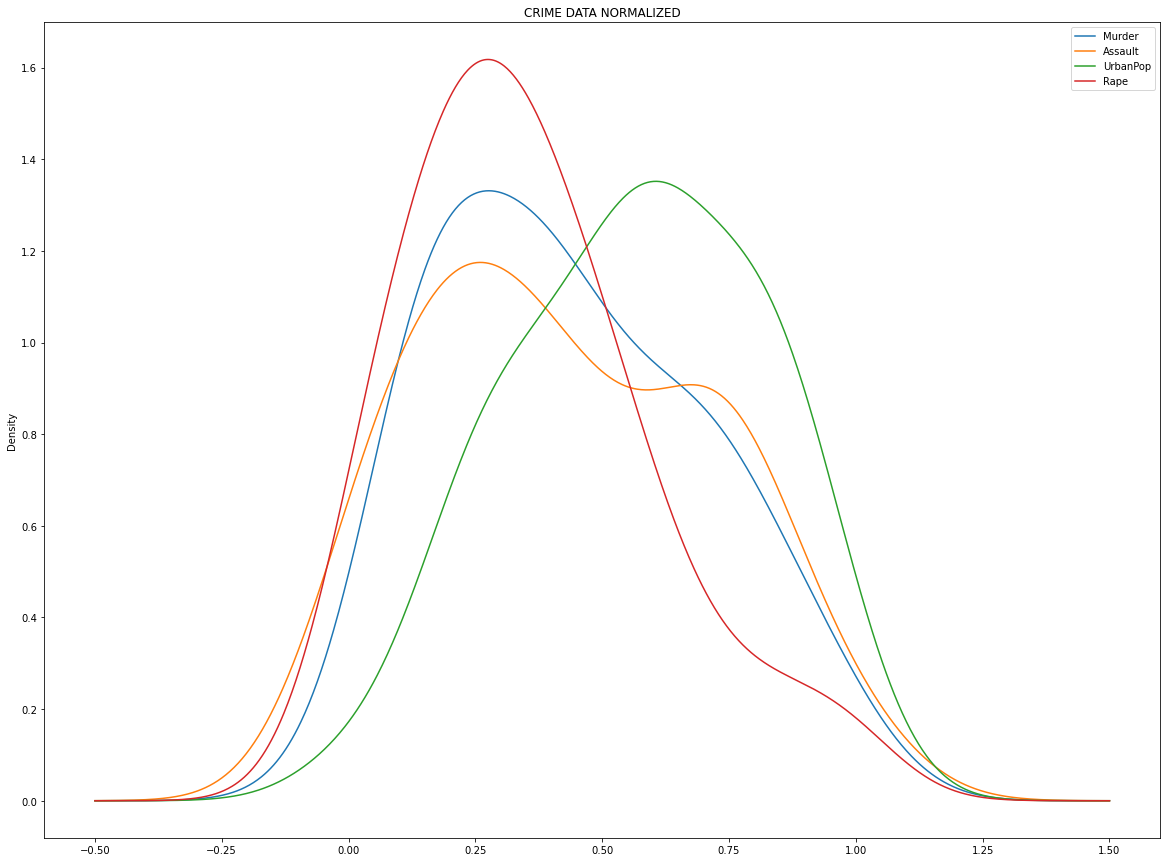

In [83]:
plt.rcParams['figure.figsize'] = (20,15)
df_norm[['Murder', 'Assault', 'UrbanPop', 'Rape']].plot(kind='kde', title="CRIME DATA NORMALIZED")
plt.show()

# Lets Cluster our Normalized dataset

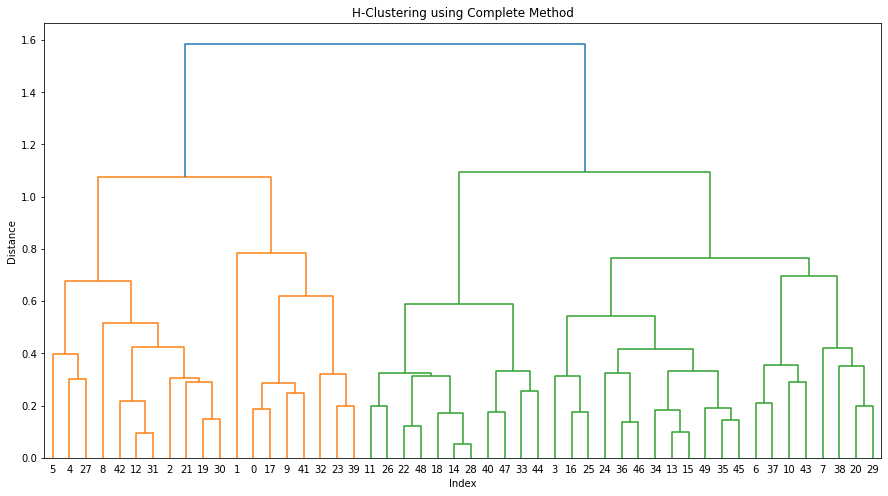

In [84]:
z = linkage(df_norm, method='complete', metric='euclidean')

plt.figure(figsize=(15,8));plt.title('H-Clustering using Complete Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

Single Method

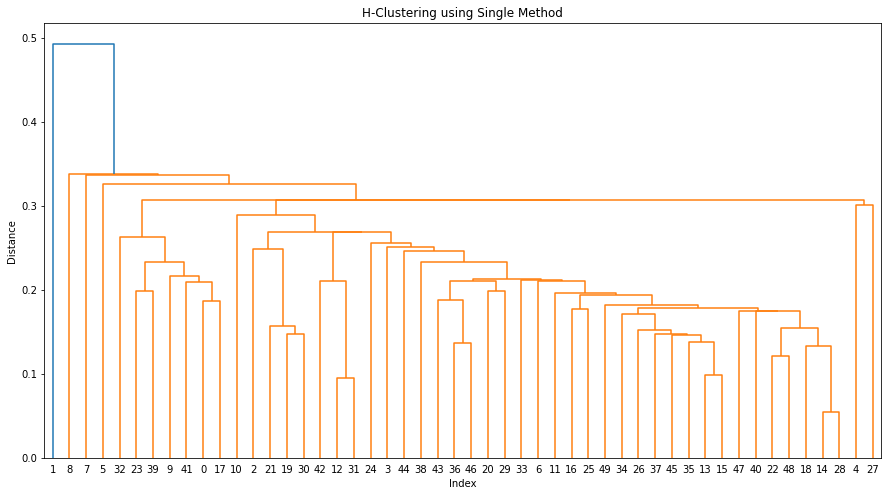

In [85]:
z_sing = linkage(df_norm, method='single', metric='euclidean')

plt.figure(figsize=(15,8));plt.title('H-Clustering using Single Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_sing, leaf_rotation=0, leaf_font_size=10)
plt.show()

Centorid Method

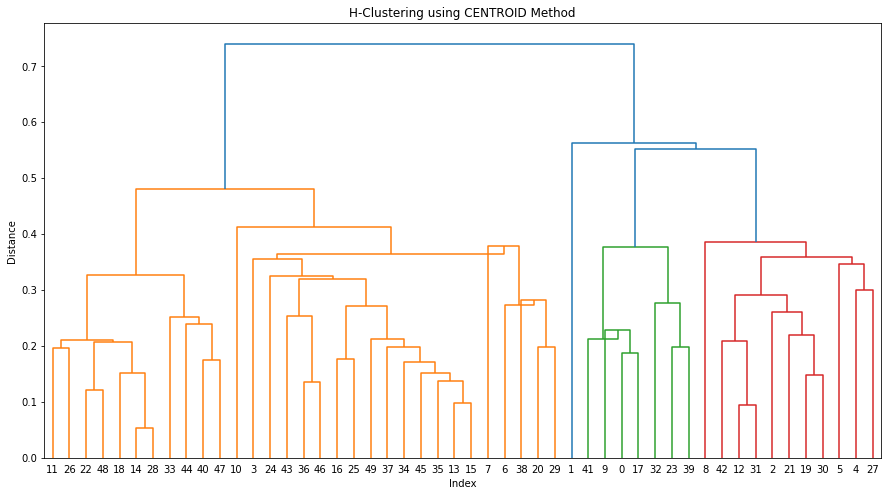

In [86]:
z_cent = linkage(df_norm, method='centroid', metric='euclidean')

plt.figure(figsize=(15,8));plt.title('H-Clustering using CENTROID Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_cent, leaf_rotation=0, leaf_font_size=10)
plt.show()

Ward Method

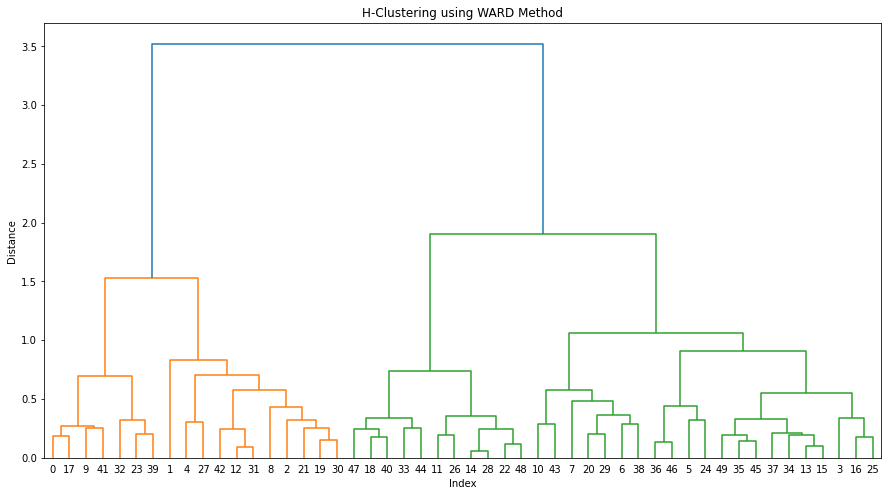

In [87]:
z_ward = linkage(df_norm, method='ward', metric='euclidean')

plt.figure(figsize=(15,8));plt.title('H-Clustering using WARD Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0, leaf_font_size=10)
plt.show()

Average Method

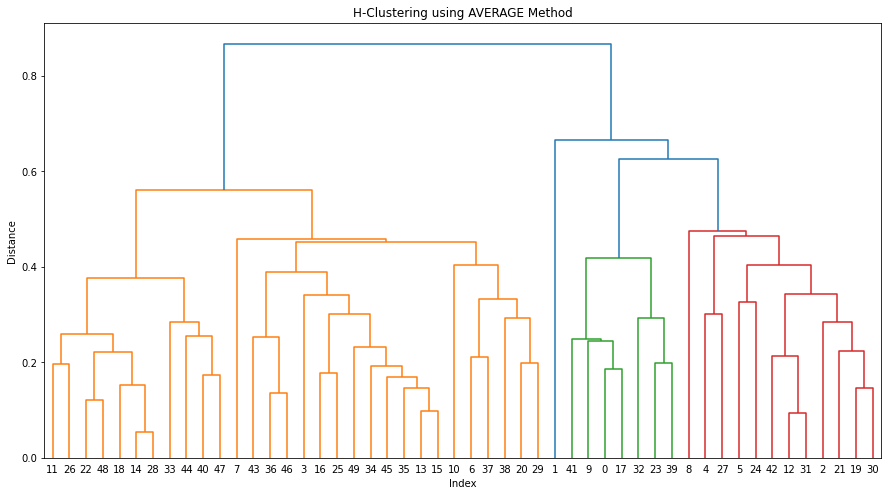

In [88]:
z_avg = linkage(df_norm, method='average', metric='euclidean')

plt.figure(figsize=(15,8));plt.title('H-Clustering using AVERAGE Method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z_avg, leaf_rotation=0, leaf_font_size=10)
plt.show()

Based on above visuals lets cluster our normalized our data using complete and Ward with 4 clusters

In [89]:
h_stand_complete = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean').fit(df_norm)
h_stand_complete.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       2, 0, 1, 1, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [90]:
cluster_lables = pd.Series(h_stand_complete.labels_)

In [92]:
data_cluster = data.copy()
#data_cluster

In [93]:
data_cluster['clust'] = cluster_lables

data_cluster1 = data_cluster.iloc[:,[4,0,1,2,3]]
data_cluster1

,clust,Murder,Assault,UrbanPop,Rape
0,0,13,236,58,21
1,0,10,263,48,44
2,3,8,294,80,31
3,1,8,190,50,19
4,3,9,276,91,40
5,3,7,204,78,38
6,1,3,110,77,11
7,1,5,238,72,15
8,3,15,335,80,31
9,0,17,211,60,25


In [94]:
data_cluster_group = data_cluster1.iloc[:,1:].groupby(data_cluster1['clust']).mean()
data_cluster_group

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,13.875000,252.750000,53.500000,24.125000
1,5.800000,140.400000,70.350000,18.650000
2,2.363636,73.000000,52.000000,10.909091
3,10.727273,264.090909,79.090909,32.272727


In [95]:
data_cluster_group.to_csv("CRIME_DATA_NORM_COMPLETE.csv", encoding='utf8')

Lets Cluster using WARD method

In [96]:
h_ward = AgglomerativeClustering(n_clusters=4,linkage='ward',affinity='euclidean').fit(df_norm)
h_ward.labels_

array([3, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 0, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [97]:
cluster_lables = pd.Series(h_ward.labels_)

In [98]:
data_ward = data.copy()
#data_ward

In [99]:
data_ward['clust'] = cluster_lables

data_ward1 = data_ward.iloc[:,[4,0,1,2,3]]
#data_ward1

In [100]:
data_ward_group = data_ward1.iloc[:,1:].groupby(data_ward1['clust']).mean()
data_ward_group

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,5.857143,143.428571,70.714286,19.571429
1,11.000000,269.454545,76.363636,32.818182
2,2.363636,73.000000,52.000000,10.909091
3,14.428571,251.285714,54.285714,21.285714


In [101]:
data_ward_group.to_csv("CRIME_DATA_WARD_COMPLETE.csv", encoding='utf8')

#### ------------------ ##### ------------------ ###### --------------------------- ########
 
Based on the above analysis, we have clustered our data into different clusters using different methods. We can use Complete method with Euclidean distance on standardized data